# Title: Symptom-Based Disease Prediction Using Machine Learning

# Description:

This project focuses on developing a system that predicts potential health conditions based on symptoms reported by users. The goal is to provide users with a tool that can help identify possible diseases or health conditions early on, encouraging timely medical consultations and proactive health management.

# load dataset & tools

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, f1_score, precision_score, recall_score
import pickle
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from spellchecker import SpellChecker
from fuzzywuzzy import process
# ignore warning
import warnings
warnings.filterwarnings('ignore')

In [11]:
dataset = pd.read_csv('Training.csv')
dataset.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [10]:
dataset['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [3]:
dataset.shape

(4920, 133)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [5]:
description = pd.read_csv('description.csv')
description.head()

,Disease,Description
0,Fungal infection,Fungal infection is a common skin condition ca...
1,Allergy,Allergy is an immune system reaction to a subs...
2,GERD,GERD (Gastroesophageal Reflux Disease) is a di...
3,Chronic cholestasis,Chronic cholestasis is a condition where bile ...
4,Drug Reaction,Drug Reaction occurs when the body reacts adve...


In [6]:
description.shape

(41, 2)

In [7]:
description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Disease      41 non-null     object
 1   Description  41 non-null     object
dtypes: object(2)
memory usage: 788.0+ bytes


In [8]:
medications = pd.read_csv('medications.csv')
medications.head()

,Disease,Medication
0,Fungal infection,"['Antifungal Cream', 'Fluconazole', 'Terbinafi..."
1,Allergy,"['Antihistamines', 'Decongestants', 'Epinephri..."
2,GERD,"['Proton Pump Inhibitors (PPIs)', 'H2 Blockers..."
3,Chronic cholestasis,"['Ursodeoxycholic acid', 'Cholestyramine', 'Me..."
4,Drug Reaction,"['Antihistamines', 'Epinephrine', 'Corticoster..."


In [9]:
medications.shape

(41, 2)

In [10]:
medications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     41 non-null     object
 1   Medication  41 non-null     object
dtypes: object(2)
memory usage: 788.0+ bytes


In [11]:
symtoms_df = pd.read_csv('symptoms.csv')
symtoms_df.drop('Unnamed: 0',axis=1,inplace=True)
symtoms_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN


In [12]:
symtoms_df.shape

(4920, 5)

In [13]:
symtoms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Disease    4920 non-null   object
 1   Symptom_1  4920 non-null   object
 2   Symptom_2  4920 non-null   object
 3   Symptom_3  4920 non-null   object
 4   Symptom_4  4572 non-null   object
dtypes: object(5)
memory usage: 192.3+ KB


In [14]:
precautions_df = pd.read_csv('precautions.csv')
precautions_df.drop('Unnamed: 0',axis=1,inplace=True)
precautions_df.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [15]:
precautions_df.shape

(41, 5)

In [16]:
precautions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Disease       41 non-null     object
 1   Precaution_1  41 non-null     object
 2   Precaution_2  41 non-null     object
 3   Precaution_3  40 non-null     object
 4   Precaution_4  40 non-null     object
dtypes: object(5)
memory usage: 1.7+ KB


In [17]:
diets = pd.read_csv('diets.csv')
diets.head()

,Disease,Diet
0,Fungal infection,"['Antifungal Diet', 'Probiotics', 'Garlic', 'C..."
1,Allergy,"['Elimination Diet', 'Omega-3-rich foods', 'Vi..."
2,GERD,"['Low-Acid Diet', 'Fiber-rich foods', 'Ginger'..."
3,Chronic cholestasis,"['Low-Fat Diet', 'High-Fiber Diet', 'Lean prot..."
4,Drug Reaction,"['Antihistamine Diet', 'Omega-3-rich foods', '..."


In [18]:
diets.shape

(41, 2)

In [19]:
diets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Disease  41 non-null     object
 1   Diet     41 non-null     object
dtypes: object(2)
memory usage: 788.0+ bytes


In [20]:
workout_df = pd.read_csv('workout.csv',usecols=[2,3])
workout_df.head()

,disease,workout
0,Fungal infection,Avoid sugary foods
1,Fungal infection,Consume probiotics
2,Fungal infection,Increase intake of garlic
3,Fungal infection,Include yogurt in diet
4,Fungal infection,Limit processed foods


In [21]:
workout_df.shape

(410, 2)

In [22]:
workout_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   disease  410 non-null    object
 1   workout  410 non-null    object
dtypes: object(2)
memory usage: 6.5+ KB


# Visualizing Symptoms on various plots

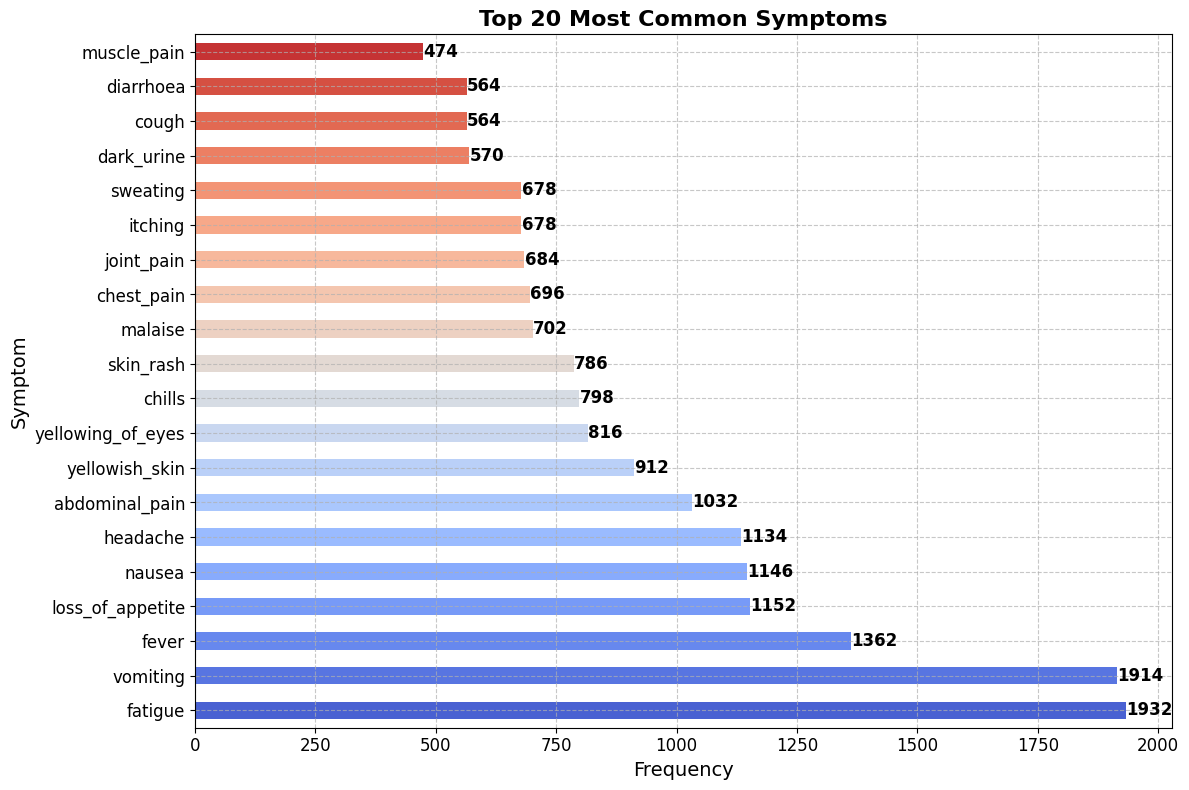

In [23]:
symptom_frequencies = dataset.drop('prognosis', axis=1).sum()

# Sort symptoms by frequency in descending order (top 20)
top_symptoms = symptom_frequencies.sort_values(ascending=False).head(20)

# Plot the bar chart with improved aesthetics
plt.figure(figsize=(12, 8))
ax = top_symptoms.plot(kind='barh', color=sns.color_palette("coolwarm", len(top_symptoms)))

# Add labels on top of bars
for index, value in enumerate(top_symptoms):
    ax.text(value + 0.5, index, str(value), va='center', fontsize=12, fontweight='bold')

# Add titles and labels
plt.title('Top 20 Most Common Symptoms', fontsize=16, fontweight='bold')
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Symptom', fontsize=14)

# Customize ticks and labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display grid lines for clarity
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

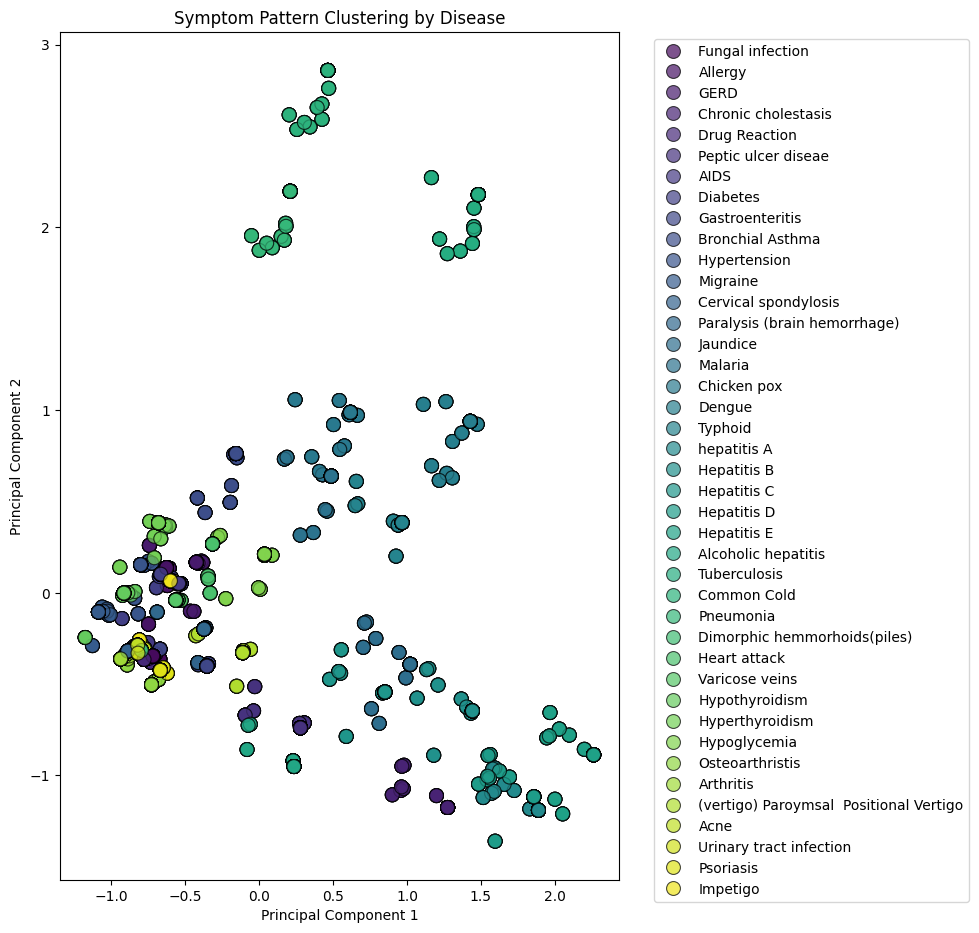

In [24]:
from sklearn.decomposition import PCA
symptom_columns = dataset.drop('prognosis', axis=1).columns
X = dataset[symptom_columns]
y = dataset['prognosis']  # Disease labels

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Convert to DataFrame for easier plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Disease'] = y

# Plotting
plt.figure(figsize=(10, 10))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Disease', palette='viridis', s=100, alpha=0.7, edgecolor='k')
plt.title("Symptom Pattern Clustering by Disease")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Encoding Diseases

In [25]:
names = dataset.prognosis.unique()
names

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [26]:
len(dataset.prognosis.unique())

41

In [27]:
value_counts = dataset.prognosis.value_counts()
value_counts 

prognosis
Fungal infection                           120
Allergy                                    120
GERD                                       120
Chronic cholestasis                        120
Drug Reaction                              120
Peptic ulcer diseae                        120
AIDS                                       120
Diabetes                                   120
Gastroenteritis                            120
Bronchial Asthma                           120
Hypertension                               120
Migraine                                   120
Cervical spondylosis                       120
Paralysis (brain hemorrhage)               120
Jaundice                                   120
Malaria                                    120
Chicken pox                                120
Dengue                                     120
Typhoid                                    120
hepatitis A                                120
Hepatitis B                                120
Hep

In [28]:
### Transform Object Columns into Numbers
label = LabelEncoder()
dataset.prognosis = label.fit_transform(dataset.prognosis)
dataset.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


# Train-Test Split

In [29]:
X = dataset.drop('prognosis',axis=1)
y = dataset['prognosis']
keys = X.columns
X.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
y.head()

0    15
1    15
2    15
3    15
4    15
Name: prognosis, dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=41, shuffle =True,stratify=y)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (3936, 132)
X_test shape is  (984, 132)
y_train shape is  (3936,)
y_test shape is  (984,)


# Training top models

In [32]:
models = {
    'RandomForest': RandomForestClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression()
}
### Validation Score
cv_results = {}
for model_name, model in models.items():
    print(f"Cross-validating {model_name}...")
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    cv_results[model_name] = cv_scores.mean()
    print(f"Mean accuracy for {model_name}: {cv_scores.mean():.4f}")

Cross-validating RandomForest...
Mean accuracy for RandomForest: 1.0000
Cross-validating DecisionTree...
Mean accuracy for DecisionTree: 0.9982
Cross-validating KNN...
Mean accuracy for KNN: 1.0000
Cross-validating SVC...
Mean accuracy for SVC: 1.0000
Cross-validating LogisticRegression...
Mean accuracy for LogisticRegression: 1.0000


In [33]:
cv_results_df = pd.DataFrame(list(cv_results.items()), columns=['Model', 'Mean Accuracy'])
cv_results_df = cv_results_df.sort_values(by='Mean Accuracy', ascending=False)
cv_results_df

,Model,Mean Accuracy
0,RandomForest,1.000000
2,KNN,1.000000
3,SVC,1.000000
4,LogisticRegression,1.000000
1,DecisionTree,0.998221


In [34]:
best_model_name = cv_results_df.iloc[0]['Model']
print(f"\nBest model from CV: {best_model_name}")


Best model from CV: RandomForest


In [35]:
### Search best Parameters
param_grids = {
    'RandomForest': {'n_estimators': [10, 20, 30, 40], 'max_depth': [None, 10, 20, 30, 40], 'min_samples_split': [2, 5, 10]},
    'DecisionTree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    'KNN': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'p': [1, 2]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']},
    'LogisticRegression': {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
}
best_results = []
for model_name, model in models.items():
    print(f"\nPerforming GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    # Store the best score and parameters
    best_results.append({'Model': model_name, 'Best Score': best_score, 'Best Params': best_params})
    print(f"\nBest parameters for {model_name}: {best_params}")
    print(f"Best cross-validation score for {model_name}: {best_score:.4f}")


Performing GridSearchCV for RandomForest...
Fitting 5 folds for each of 60 candidates, totalling 300 fits

Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}
Best cross-validation score for RandomForest: 1.0000

Performing GridSearchCV for DecisionTree...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best parameters for DecisionTree: {'max_depth': None, 'min_samples_split': 2}
Best cross-validation score for DecisionTree: 0.9982

Performing GridSearchCV for KNN...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best parameters for KNN: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best cross-validation score for KNN: 1.0000

Performing GridSearchCV for SVC...
Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best parameters for SVC: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score for SVC: 1.0000

Performing GridSearchCV for LogisticRegression...
Fitting 5 folds for 

In [36]:
best_results_df = pd.DataFrame(best_results)
best_results_df = best_results_df.sort_values(by='Best Score', ascending=False)
best_results_df

,Model,Best Score,Best Params
0,RandomForest,1.000000,"{'max_depth': None, 'min_samples_split': 2, 'n..."
2,KNN,1.000000,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}"
3,SVC,1.000000,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}"
4,LogisticRegression,1.000000,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblin..."
1,DecisionTree,0.998221,"{'max_depth': None, 'min_samples_split': 2}"


In [37]:
best_model_name, best_model_param = best_results_df.iloc[0]['Model'],best_results_df.iloc[0]['Best Params']
print(f"\nBest model : {best_model_name}")
print(f"\nBest Parameters : {best_model_param}")


Best model : RandomForest

Best Parameters : {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}


# Visualizing Top Models

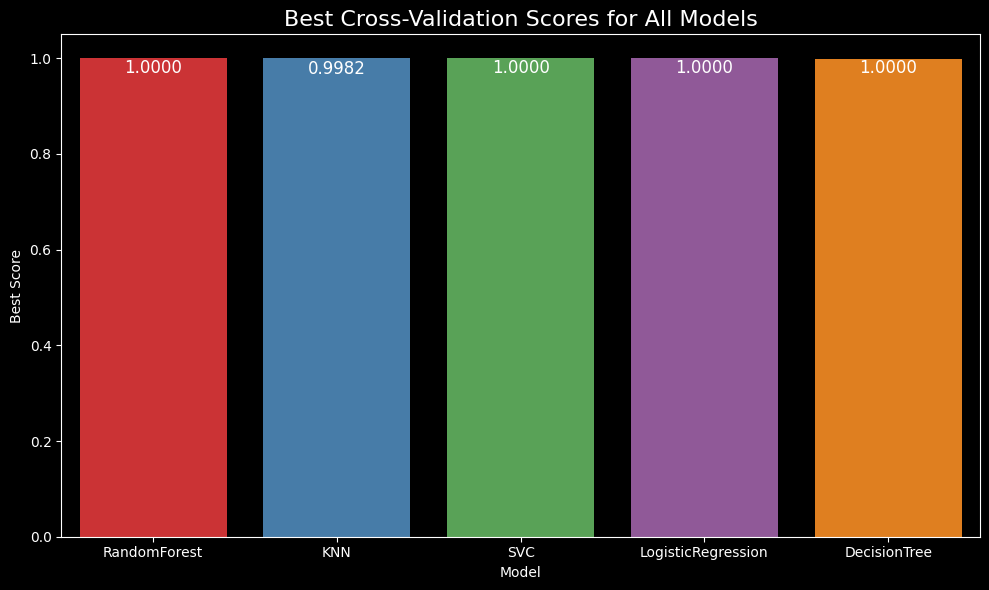

In [38]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
sns.barplot(data=best_results_df, x='Model', y='Best Score', palette="Set1")
plt.title('Best Cross-Validation Scores for All Models', fontsize=16, color='white')
plt.xlabel('Model', color='white')
plt.ylabel('Best Score', color='white')
for index, row in best_results_df.iterrows():
    plt.text(index, row['Best Score'] - 0.02, f'{row["Best Score"]:.4f}', 
             color='white', ha="center", va="center", fontsize=12)
plt.tight_layout()
plt.show()

# Traing and Evaluating Best Model (Random Forset)

In [39]:
########## Best Model Training
model = RandomForestClassifier(max_depth = None, min_samples_split = 2, n_estimators = 10)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [40]:
### Evaluate the model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred,average='micro')  
train_recall = recall_score(y_train, y_train_pred,average='micro')  
train_f1 = f1_score(y_train, y_train_pred,average='micro')  
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred,average='micro') 
test_recall = recall_score(y_test, y_test_pred,average='micro')  
test_f1 = f1_score(y_test, y_test_pred,average='micro') 
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Training Precision: {train_precision:.2f}')
print(f'Training Recall: {train_recall:.2f}')
print(f'Training F1-Score: {train_f1:.2f}')
print('---')
print(f'Test Accuracy: {test_accuracy:.2f}')
print(f'Test Precision: {test_precision:.2f}')
print(f'Test Recall: {test_recall:.2f}')
print(f'Test F1-Score: {test_f1:.2f}')

Training Accuracy: 1.00
Training Precision: 1.00
Training Recall: 1.00
Training F1-Score: 1.00
---
Test Accuracy: 1.00
Test Precision: 1.00
Test Recall: 1.00
Test F1-Score: 1.00


# Visualizing Best Model

Confusion Matrix is : 
 [[24  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 24]]


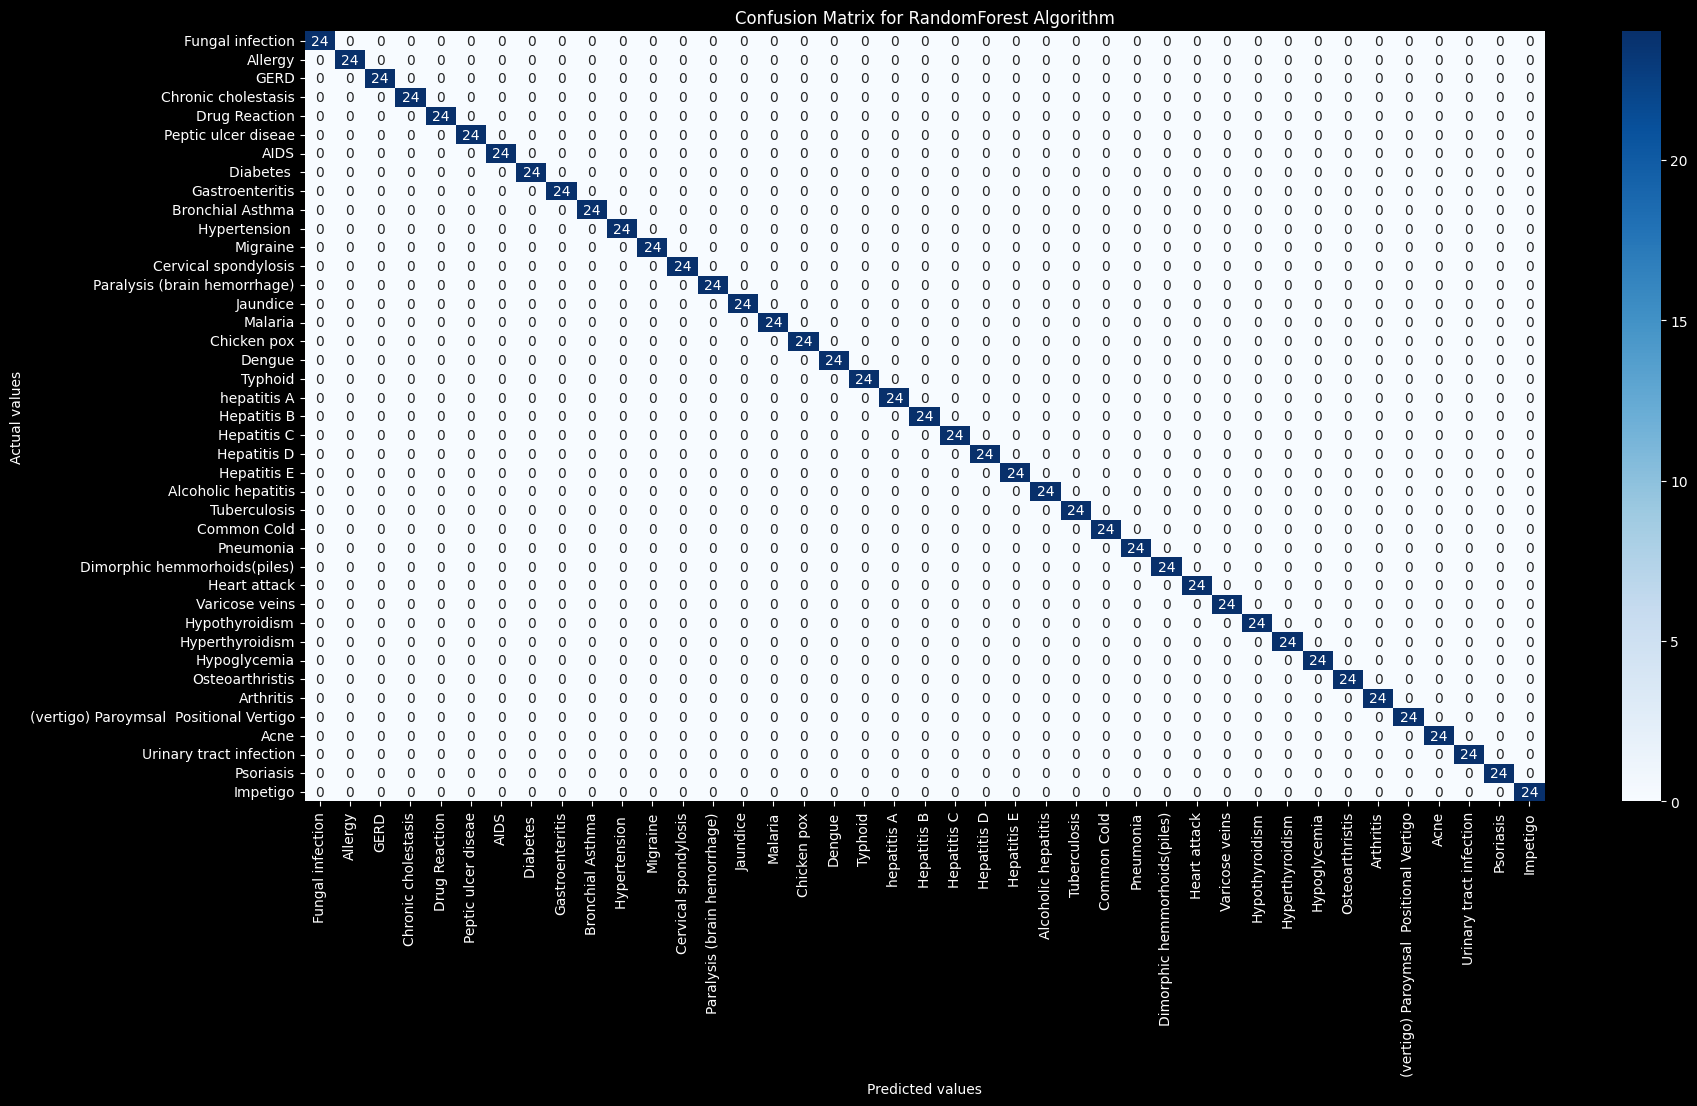

In [41]:
### Check model
CM = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix is : \n', CM)
plt.figure(figsize=(20,10))
sns.heatmap(data=CM, annot=True,fmt='g', cmap="Blues", xticklabels=names, yticklabels=names)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title(f'Confusion Matrix for {best_model_name} Algorithm')
plt.show()

In [42]:
ClassificationReport = classification_report(y_test,y_test_pred,target_names=names)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                                           precision    recall  f1-score   support

                       Fungal infection       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        24
                                   GERD       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                          Drug Reaction       1.00      1.00      1.00        24
                    Peptic ulcer diseae       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                              Diabetes        1.00      1.00      1.00        24
                        Gastroenteritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                          Hypertension        1.00      1.00      1.00        24

# Saving the model

In [43]:
pickle.dump(model,open('random.pkl','wb'))

In [44]:
symptoms_dict = {}
diseases_list = {}
for name in names:
    diseases_list[label.transform([name])[0]] = name
with open('diseases_list.pkl', 'wb') as f:
    pickle.dump(diseases_list, f)
for i,name in enumerate(keys):
    symptoms_dict[name] = i
with open('symptoms_dict.pkl', 'wb') as f:
    pickle.dump(symptoms_dict, f)
print('*******************symptoms_dict*****************\n\n',symptoms_dict)
print('\n\n*******************diseases_list*****************\n\n',diseases_list)

*******************symptoms_dict*****************

 {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelle

# Recommendation System and Prediction

In [45]:

def helper(dis):
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc]) 

    pre = precautions_df[precautions_df['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout_df[workout_df['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout

# Model Prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[model.predict([input_vector])[0]]

In [46]:
symptoms = 'inflammatory_nails, blister, red_sore_around_nose, yellow_crust_ooze'
user_symptoms = [s.strip() for s in symptoms.split(',')]

predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
i = 1
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================Suggestions==================")
i = 1
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
i = 1
for d_i in die:
    print(i, ": ", d_i)
    i += 1

=================predicted disease============
Impetigo
=================description==================
Impetigo is a highly contagious skin infection causing red sores that can break open.
=================precautions==================
1 :  soak affected area in warm water
2 :  use antibiotics
3 :  remove scabs with wet compressed cloth
4 :  consult doctor
=================medications==================
1 :  ['Topical antibiotics', 'Oral antibiotics', 'Antiseptics', 'Ointments', 'Warm compresses']
=================Suggestions==================
1 :  Maintain good hygiene
2 :  Stay hydrated
3 :  Consume nutrient-rich foods
4 :  Limit sugary foods and beverages
5 :  Include foods rich in vitamin C
6 :  Consult a healthcare professional
7 :  Follow medical recommendations
8 :  Avoid scratching
9 :  Take prescribed antibiotics
10 :  Practice wound care
=================diets==================
1 :  ['Impetigo Diet', 'Antibiotic treatment', 'Fruits and vegetables', 'Hydration', 'Protein-rich f

In [47]:
symptoms = 'redness_of_eyes, sinus_pressure, runny_nose, congestion'
user_symptoms = [s.strip() for s in symptoms.split(',')]

predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
i = 1
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================Suggestions==================")
i = 1
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
i = 1
for d_i in die:
    print(i, ": ", d_i)
    i += 1

=================predicted disease============
Common Cold
=================description==================
Common Cold is a viral infection of the upper respiratory tract.
=================precautions==================
1 :  drink vitamin c rich drinks
2 :  take vapour
3 :  avoid cold food
4 :  keep fever in check
=================medications==================
1 :  ['Antibiotics', 'Antiviral drugs', 'Antifungal drugs', 'IV fluids', 'Oxygen therapy']
=================Suggestions==================
1 :  Stay hydrated
2 :  Include nutrient-rich foods
3 :  Consume foods rich in vitamin C and antioxidants
4 :  Include zinc-rich foods
5 :  Limit sugary foods and beverages
6 :  Consume chicken soup
7 :  Consult a healthcare professional
8 :  Rest and conserve energy
9 :  Gradually resume normal diet
10 :  Follow medical recommendations
=================diets==================
1 :  ['Cold Diet', 'Hydration', 'Warm fluids', 'Rest', 'Honey and lemon tea']


In [48]:
symptoms = 'runny_nose, congestion, toxic_look_(typhos)'
user_symptoms = [s.strip() for s in symptoms.split(',')]

predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
i = 1
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================Suggestions==================")
i = 1
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
i = 1
for d_i in die:
    print(i, ": ", d_i)
    i += 1

=================predicted disease============
Typhoid
=================description==================
Typhoid is a bacterial infection that can lead to a high fever and gastrointestinal symptoms.
=================precautions==================
1 :  eat high calorie vegitables
2 :  antiboitic therapy
3 :  consult doctor
4 :  medication
=================medications==================
1 :  ['Vaccination', 'Antiviral drugs', 'IV fluids', 'Blood transfusions', 'Liver transplant']
=================Suggestions==================
1 :  Consume easily digestible foods
2 :  Stay hydrated
3 :  Include nutrient-rich foods
4 :  Consume foods rich in vitamin C and antioxidants
5 :  Include protein-rich foods
6 :  Avoid fatty and greasy foods
7 :  Consult a healthcare professional
8 :  Gradually resume normal diet
9 :  Follow medical recommendations
10 :  Avoid alcohol and caffeine
=================diets==================
1 :  ['Typhoid Diet', 'High-Calorie Diet', 'Soft and bland foods', 'Hydration', 'Pr

In [49]:
# Initialize the spell checker
spell = SpellChecker()

# Function to correct spelling in an array of strings
def correct_spelling_in_array(symptoms):
    corrected_array = []
    for symptom in symptoms:
        # Split each symptom into words, correct each word, then join them back
        corrected_words = [spell.correction(word) for word in symptom.split()]
        corrected_array.append("_".join(corrected_words))
    return corrected_array

In [50]:
known_symptoms = dataset.columns.to_list()
def filter_known_symptoms(user_symptoms):
    recognized_symptoms = [symptom for symptom in user_symptoms if symptom in known_symptoms]
    return recognized_symptoms

In [51]:
# Split the user's input into a list of symptoms (assuming they are comma-separated) # yellow_crust_ooze,red_sore_around_nose,small_dents_in_nails,inflammatory_nails,blister
symptoms = input("Enter your symptoms (atleast three).......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
corrected_symptoms_array = correct_spelling_in_array(user_symptoms)
recognized_symptoms = filter_known_symptoms(corrected_symptoms_array)
predicted_disease = get_predicted_value(recognized_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================Predicted Disease============")
print(predicted_disease)
print("=================Description==================")
print(desc)
print("=================Precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================Medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================Suggestions==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1


Enter your symptoms (atleast three)....... Nausea, vomiting, loss of appetite, abdominal pain, jaundice


=================Predicted Disease============
Peptic ulcer diseae
=================Description==================

=================Precautions==================
1 :  avoid fatty spicy food
2 :  consume probiotic food
3 :  eliminate milk
4 :  limit alcohol
=================Medications==================
=================Suggestions==================
=================diets==================
